In [50]:
import numpy as np 
import pandas as pd 
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt# Visualization 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
hr = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv", header=0) #Read the dataset
hr.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
'''Column names in our dataset'''

hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [41]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

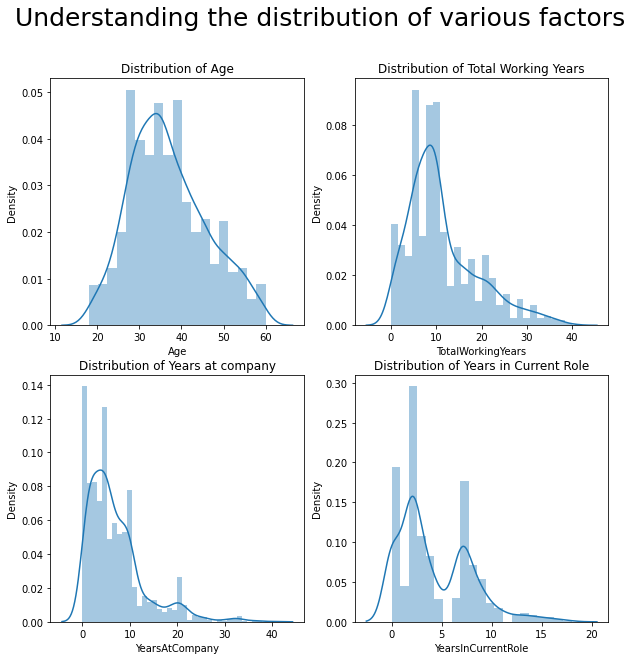

In [18]:
warnings.filterwarnings("ignore")
fig,ax = plt.subplots(2,2, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Understanding the distribution of various factors", fontsize=25)
sns.distplot(hr['Age'], ax = ax[0,0])  
ax[0][0].set_title('Distribution of Age')
sns.distplot(hr['TotalWorkingYears'], ax = ax[0,1]) 
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(hr['YearsAtCompany'], ax = ax[1,0])  
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(hr['YearsInCurrentRole'], ax = ax[1,1])  
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()  

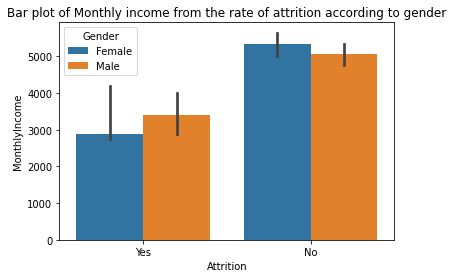

In [49]:
#Bar plot of Monthly income from the rate of attrition according to gender

from numpy import median

plt.title("Bar plot of Monthly income from the rate of attrition according to gender")
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=hr, estimator=median)
plt.show()




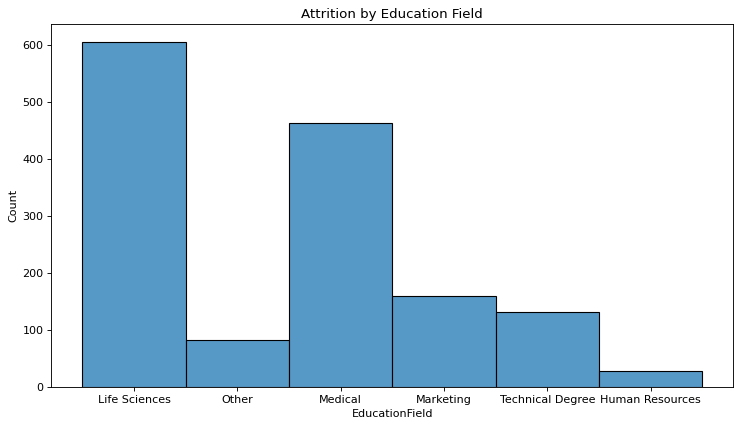

In [48]:

plt.figure(figsize=(11,6), dpi=80)
sns.histplot(data=hr, x='EducationField').set_title('Attrition by Education Field');

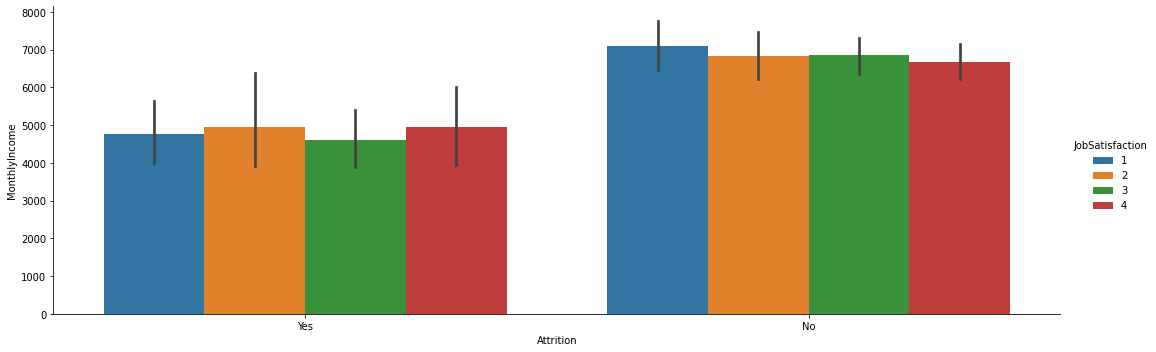

In [27]:
attrition_byincome = sns.catplot(x="Attrition", y="MonthlyIncome",
                hue="JobSatisfaction", 
                data=hr, kind="bar",
                height=5, aspect=3);

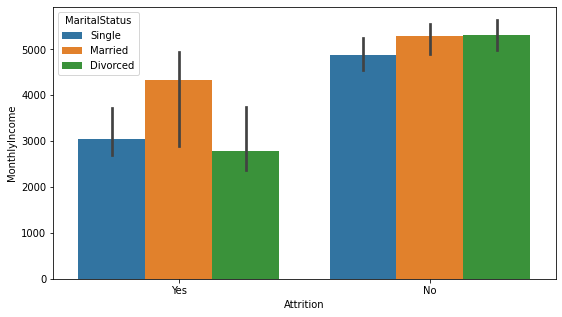

In [34]:
#defining size of the plot
fig, ax = plt.subplots(figsize=(9, 5))

sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=hr, estimator=median,ax=ax)
plt.show()

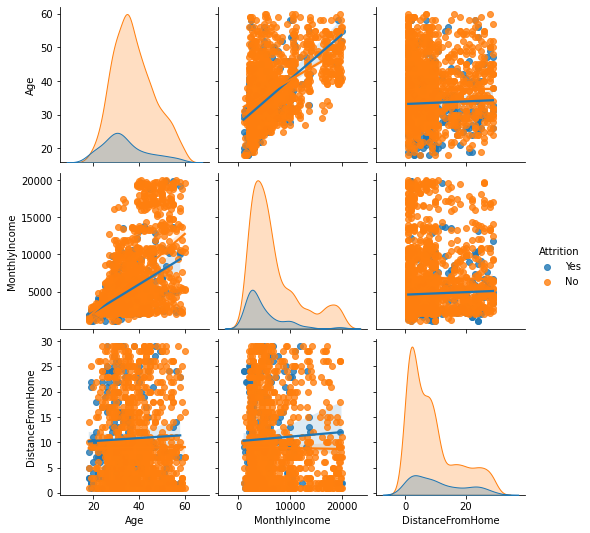


The above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly 
 rate and percent salary hike is same for both female and male employees.


In [40]:
data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(hr[data1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()


print("\nThe above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly \n rate and percent salary hike is same for both female and male employees.")

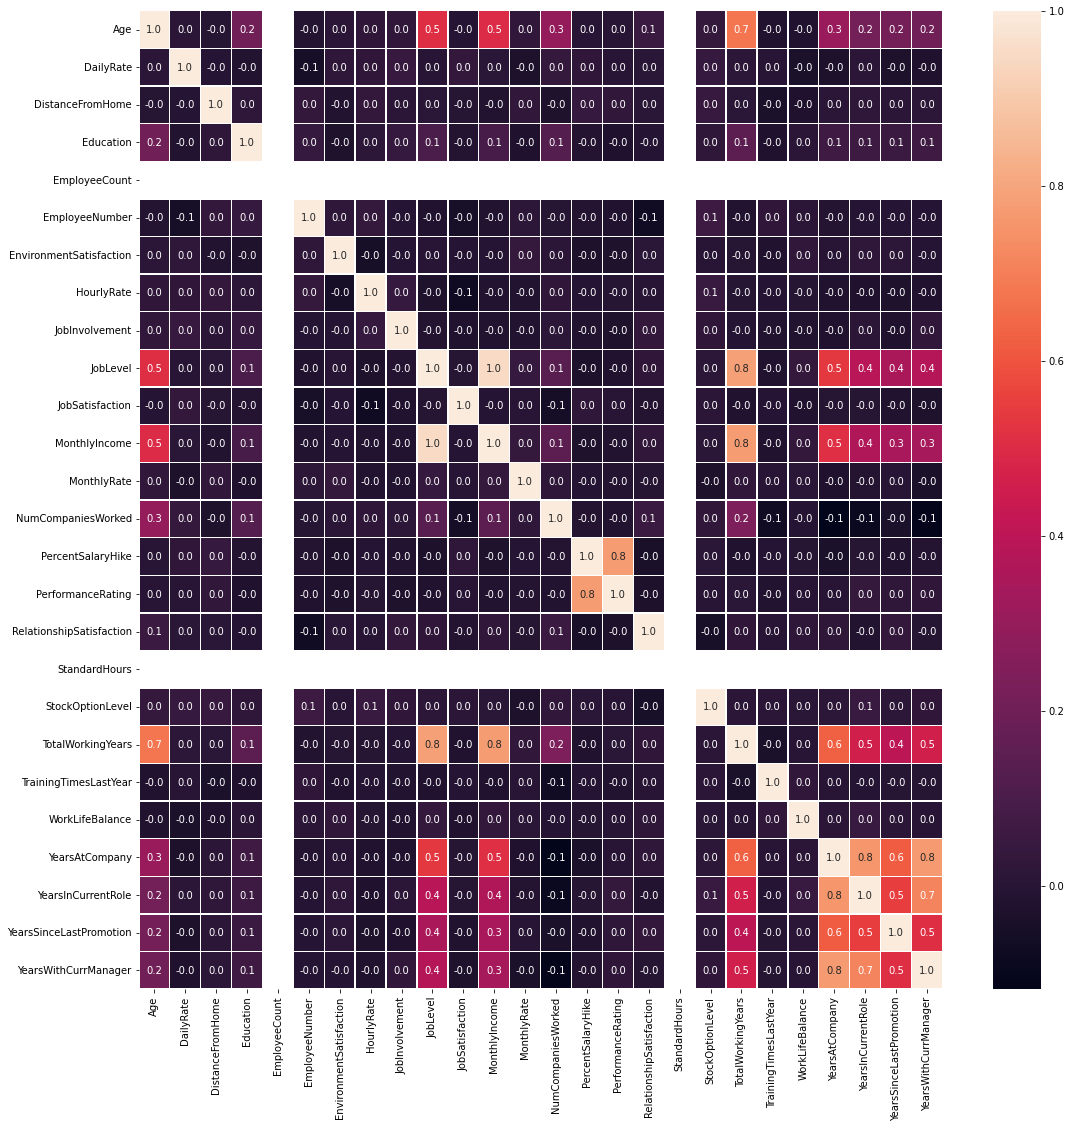

In [36]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(hr.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

#Build a logistic regression model to predict which employees are likely to attrite

In [89]:
'''Preparing our dataset'''

## below is to convert Object values to int

x['Gender']=x['Gender'].replace("Female", 1)
x['Gender']=x['Gender'].replace("Male", 0)


x['OverTime']=x['Gender'].replace("Yes", 1)
x['OverTime']=x['Gender'].replace("No", 0)


x['Over18']=x['Over18'].replace("Y", 1)
x['Over18']=x['Over18'].replace("N", 0)


x["MaritalStatus"]=x["MaritalStatus"].replace("Single", 0)
x["MaritalStatus"]=x["MaritalStatus"].replace("Married",1)
x["MaritalStatus"]=x["MaritalStatus"].replace("Divorced",2)


## dropping unwanted columns

x = hr.drop(['Attrition', 'DistanceFromHome', 'JobRole','NumCompaniesWorked','Department','EducationField','BusinessTravel', 'WorkLifeBalance'], axis=1)
y = hr[['Attrition']]


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [92]:

lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

# check the accuracy on the training set
print('Accuracy =', lr.score(x_train, y_train)*100,'%');

Accuracy = 84.94897959183673 %


In [93]:
lr_y_pred = lr.predict(x_test)

In [94]:
pd.DataFrame(lr_y_pred).head()

,0
0,No
1,No
2,Yes
3,No
4,No


In [96]:
prob = lr.predict_proba(x_test)
print(prob[:10])

[[0.95716011 0.04283989]
 [0.93601581 0.06398419]
 [0.41223968 0.58776032]
 [0.86280912 0.13719088]
 [0.97496976 0.02503024]
 [0.91310773 0.08689227]
 [0.80621454 0.19378546]
 [0.88981842 0.11018158]
 [0.96540459 0.03459541]
 [0.8822607  0.1177393 ]]


In [97]:


print('Test Accuracy Score:', accuracy_score(y_test, lr_y_pred)*100, '%\n')

print('----------------------Classification Report----------------------\n', classification_report(y_test, lr_y_pred))
print('----------------------Confusion Matrix----------------------\n', confusion_matrix(y_test, lr_y_pred))

Test Accuracy Score: 86.05442176870748 %

----------------------Classification Report----------------------
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       250
         Yes       0.64      0.16      0.25        44

    accuracy                           0.86       294
   macro avg       0.75      0.57      0.59       294
weighted avg       0.83      0.86      0.82       294

----------------------Confusion Matrix----------------------
 [[246   4]
 [ 37   7]]
